# Pymaceuticals Inc.
---

### Analysis

- There are 10 drugs that have been tested on the mouse subjects in a fairly equal male (51%) to female (49%) as referenced in the pie chart below
- Capolmulin and Ramicane seem to result in the lowest final tumor volumne, Ramicane has a slightly lower standard deviation 
- Case study on mouse ID I509 showed tumor improvement over time. The subject was using the drup Capolmulin
 

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
MickyDF = pd.merge(study_results, mouse_metadata, on=["Mouse ID"] )
# Display the data table for preview
MickyDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [125]:
# Checking the number of mice.
count_mice = len(MickyDF["Mouse ID"].unique())
count_mice

249

In [126]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = MickyDF[MickyDF.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Optional: Get all the data for the duplicate mouse ID. 
df = MickyDF.set_index("Mouse ID")
df.head()
g989 = df.loc["g989"]
g989

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [128]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MinnieDF = MickyDF[MickyDF['Mouse ID'] != 'g989']
MinnieDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [129]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(MinnieDF["Mouse ID"].unique())
clean_mice

248

## Summary Statistics

In [130]:
#Group By
GroupMeds = MinnieDF.groupby('Drug Regimen')
GroupMeds


In [131]:
#Calculate Mean
TumorMean = GroupMeds['Tumor Volume (mm3)'].mean()
TumorMean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [132]:
#Calculate Median
TumorMedian = GroupMeds['Tumor Volume (mm3)'].median()
TumorMedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [133]:
#Calculate Variance
TumorVariance = GroupMeds['Tumor Volume (mm3)'].var()
TumorVariance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [134]:
#Calculate Standard Deviation
TumorSTD = GroupMeds['Tumor Volume (mm3)'].std()
TumorSTD

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [135]:
#Calculate SEM
TumorSEM = GroupMeds['Tumor Volume (mm3)'].sem()
TumorSEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_Table = pd.DataFrame({'Mean Tumor Vol': TumorMean,
    'Median Tumor Vol': TumorMedian,
    'Tumor Vol Var': TumorVariance,
    'Tumor Vol Std Dev.': TumorSTD,
    'Tumor Vol Std. Err.': TumorSEM})
print(Summary_Table)

              Mean Tumor Vol  Median Tumor Vol  Tumor Vol Var  \
Drug Regimen                                                    
Capomulin          40.675741         41.557809      24.947764   
Ceftamin           52.591172         51.776157      39.290177   
Infubinol          52.884795         51.820584      43.128684   
Ketapril           55.235638         53.698743      68.553577   
Naftisol           54.331565         52.509285      66.173479   
Placebo            54.033581         52.288934      61.168083   
Propriva           52.320930         50.446266      43.852013   
Ramicane           40.216745         40.673236      23.486704   
Stelasyn           54.233149         52.431737      59.450562   
Zoniferol          53.236507         51.818479      48.533355   

              Tumor Vol Std Dev.  Tumor Vol Std. Err.  
Drug Regimen                                           
Capomulin               4.994774             0.329346  
Ceftamin                6.268188             0.4698

In [137]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line.
Summary_Table = GroupMeds['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
Summary_Aggie = Summary_Table.rename(columns={
    'Mean Tumor Vol':'mean',
    'Median Tumor Vol': 'median',
    'Tumor Vol Var': 'variance',
    'Tumor Vol Std. Dev.': 'standard deviation',
    'Tumor Vol Std. Err.': 'SEM'
})

Summary_Aggie



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [138]:
# calculate the number of Mice per drug
Mice_Drugs = GroupMeds["Mouse ID"].count().sort_values(ascending = False)
Mice_Drugs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

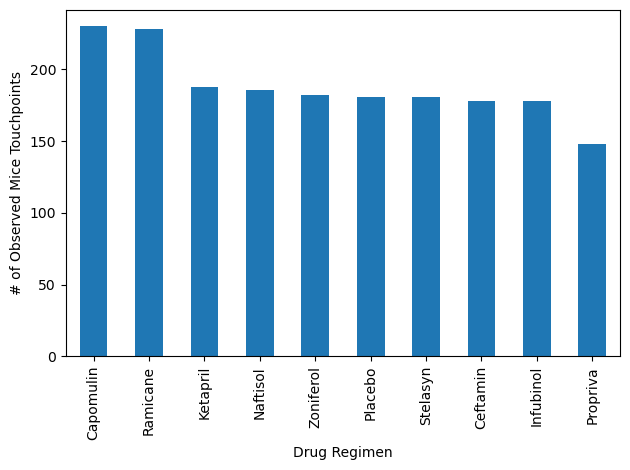

In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Bar_Chart_Observed = Mice_Drugs.plot(kind='bar', width=0.5)


Bar_Chart_Observed.set_xlabel('Drug Regimen')
Bar_Chart_Observed.set_ylabel('# of Observed Mice Touchpoints')

plt.tight_layout()


plt.show()


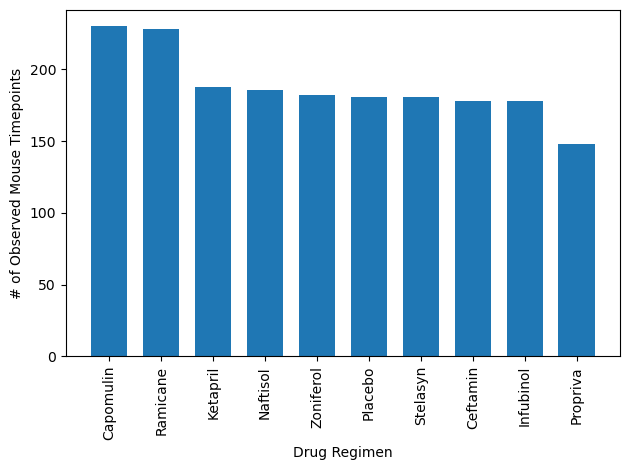

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(Mice_Drugs))
y_axis = list(Mice_Drugs.index.values)

# Create bar chart
PyBarChart = plt.bar(x_axis, Mice_Drugs, width=.7)

# Set x/y label, title
plt.xticks(x_axis, y_axis, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Save bar graph to Images folder
plt.tight_layout()


# Present the bar chart
plt.show()



In [141]:
# Count mice of each sex
sex = MinnieDF.groupby('Sex')['Sex'].count()
sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

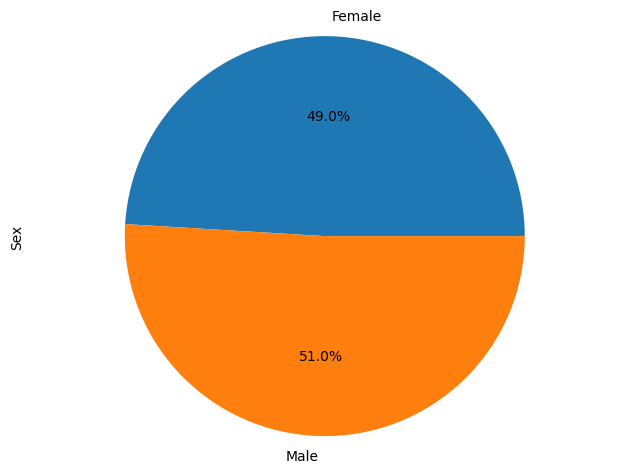

In [142]:
# Generate a pie chart
pie_sex = sex.plot(kind='pie', autopct='%1.1f%%')


plt.axis("equal")



plt.tight_layout()



plt.show()



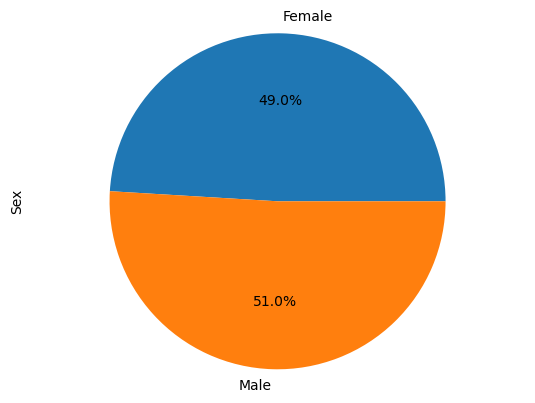

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_index = sex.index


pie_sex2 = plt.pie(sex, labels = sex_index, autopct="%1.1f%%")

plt.ylabel('Sex')
plt.axis("equal")




plt.show()


## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = MinnieDF.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumorDF = final_tumor_vol.reset_index()

In [152]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumorDF.loc[final_tumorDF['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers: outliers are below {lower_bound} and above {upper_bound}")

Capomulin's potential outliers: outliers are below 20.70456164999999 and above 51.83201549
Ramicane's potential outliers: outliers are below 17.912664470000003 and above 54.30681135
Infubinol's potential outliers: outliers are below 36.83290494999999 and above 82.74144559000001
Ceftamin's potential outliers: outliers are below 25.355449580000002 and above 87.66645829999999


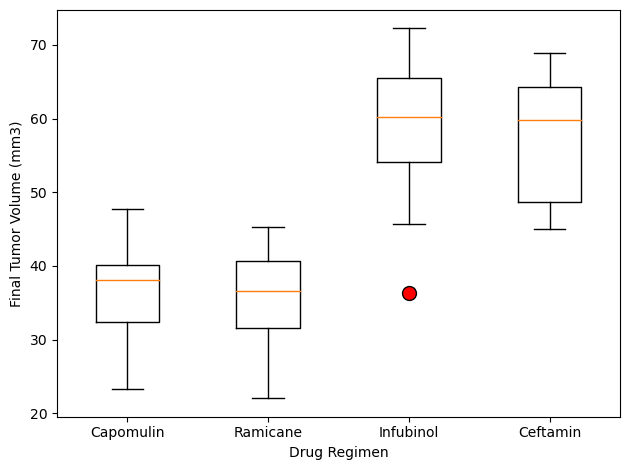

In [154]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})


final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')


plt.tight_layout()



plt.show()



## Line and Scatter Plots

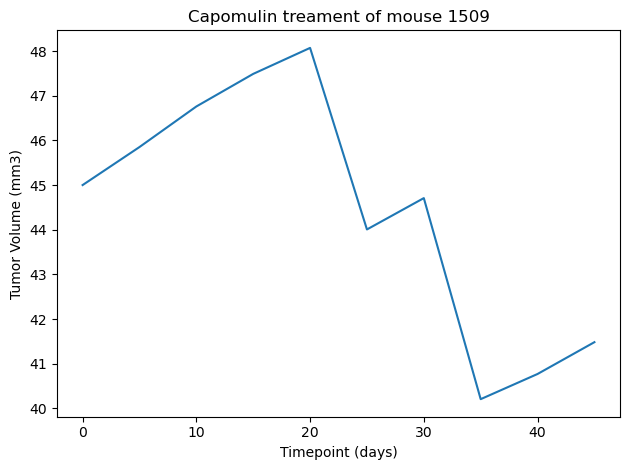

In [155]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = MinnieDF.loc[MinnieDF['Drug Regimen'] == 'Capomulin']


mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]


time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])


plt.title('Capomulin treament of mouse 1509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.tight_layout()



plt.show()



C:\Users\clayt\AppData\Local\Temp\ipykernel_14972\3883527760.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()


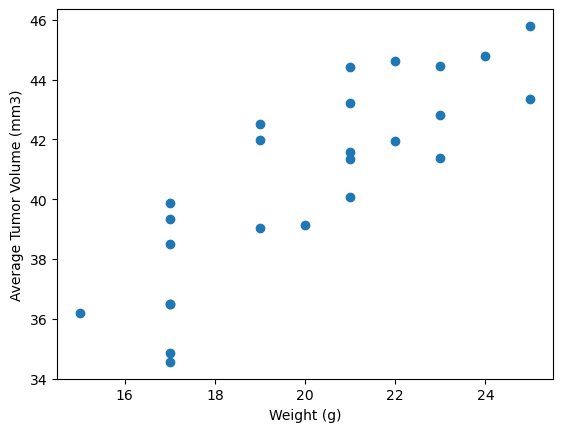

In [157]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']


plt.scatter(mice_weight_avg, mice_tumor_avg)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')




plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84


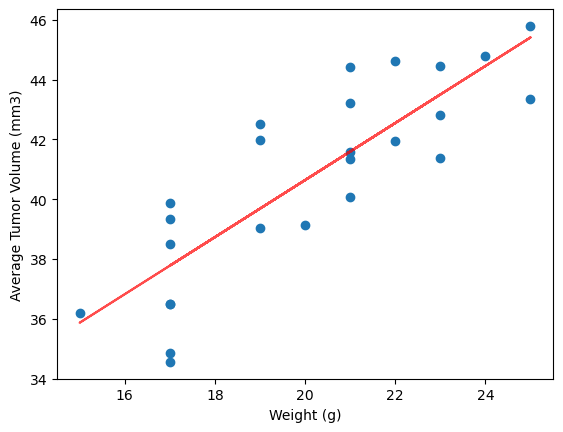

In [160]:
# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)


# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)



# Define title and x/y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Present the box plot chart
plt.show()
